In [181]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam, SGD

In [182]:
model = Sequential()
model.add(Input(shape=(9,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='relu'))
# compile the model
opt = Adam(learning_rate=0.02)
model.compile(optimizer=opt,loss='mse')

In [183]:
import sys 
sys.path.append("../../") 
from compare_algorithms.utils import create_dataset

In [184]:
filename = '../../data/week_data/data/washingtong_winter_20120101-20120107新.csv'
x_train, y_train, x_test, y_test = create_dataset(filename,seq_len=9)

In [185]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((711, 9), (711,), (288, 9), (288,))

In [186]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8, restore_best_weights=True)
# fit the model
# model.fit(x_train, y_train, epochs=200, batch_size=64,validation_split=0.1,verbose=1,callbacks=[callback])
model.fit(x_train, y_train, epochs=200, validation_split=0.1, batch_size=64,verbose=1)

Epoch 1/200
10/10 [==============================] - 1s 21ms/step - loss: 9.3597 - val_loss: 3.5045
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 1.1904 - val_loss: 0.7154
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.8338 - val_loss: 0.0755
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3541 - val_loss: 0.0857
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.2483 - val_loss: 0.1021
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2002 - val_loss: 0.0443
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1917 - val_loss: 0.0477
Epoch 8/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1402 - val_loss: 0.0193
Epoch 9/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1477 - val_loss: 0.0316
Epoch 10/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1305 - val_loss: 0.0638
Epoch 11

10/10 [==============================] - 0s 8ms/step - loss: 0.1007 - val_loss: 0.0256
Epoch 84/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0983 - val_loss: 0.0116
Epoch 85/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0889 - val_loss: 0.0178
Epoch 86/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0847 - val_loss: 0.0110
Epoch 87/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0957 - val_loss: 0.0173
Epoch 88/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0946 - val_loss: 0.0217
Epoch 89/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1055 - val_loss: 0.0504
Epoch 90/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1094 - val_loss: 0.0127
Epoch 91/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0991 - val_loss: 0.0177
Epoch 92/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0964 - val_loss: 0.0152
Epoch 93/200


10/10 [==============================] - 0s 8ms/step - loss: 0.0932 - val_loss: 0.0444
Epoch 165/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0887 - val_loss: 0.0241
Epoch 166/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1159 - val_loss: 0.0256
Epoch 167/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1150 - val_loss: 0.0191
Epoch 168/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0912 - val_loss: 0.0819
Epoch 169/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0918 - val_loss: 0.0092
Epoch 170/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1007 - val_loss: 0.0202
Epoch 171/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0847 - val_loss: 0.0302
Epoch 172/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0893 - val_loss: 0.0243
Epoch 173/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1039 - val_loss: 0.0179
Epoc

In [187]:
yhat = model.predict(x_test)
yhat.shape

(288, 1)

<IPython.core.display.Javascript object>


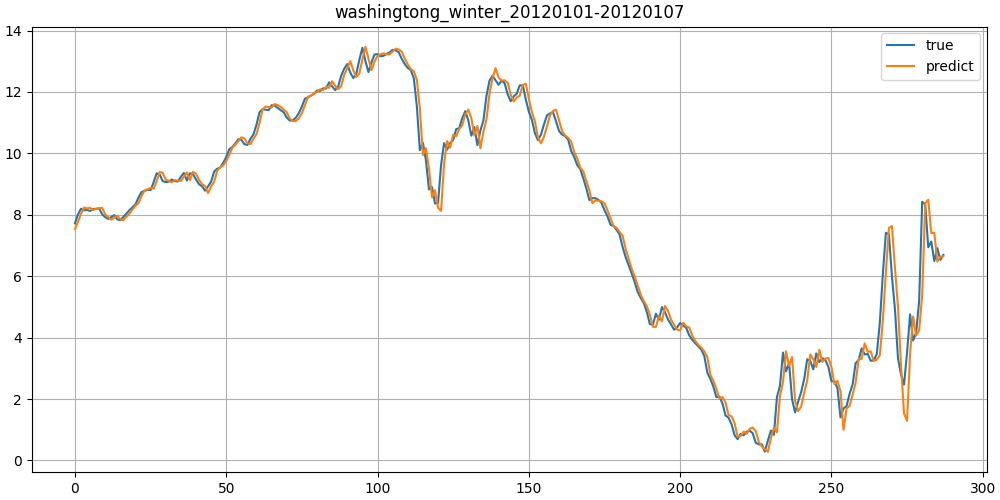

In [188]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig,ax = plt.subplots(figsize=(10, 5),layout='constrained')
ax.set_title("washingtong_winter_20120101-20120107")
ax.plot(y_test,label='true')
ax.plot(yhat,label='predict')
ax.grid()
ax.legend()
plt.show()

In [189]:
import numpy as np
def cal_mse(y_hat, y):
    mse = (np.square(y_hat - y)).mean()
    return mse

In [190]:
yhat = yhat.reshape(-1)
mse = cal_mse(yhat, y_test)
mse

0.20900030844264697

In [192]:
import pandas as pd
df = pd.DataFrame(data={
                'true_value': y_test,
                'predict': yhat
            })
df.to_csv("result/washingtong_winter_20120101-20120107_mse_"+str(mse)+".csv", index=False)